In [2]:
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *
import matplotlib



In [18]:
x = []
y = []

with open('trigger1.csv', 'r') as csvfile:
    plots= csv.reader(csvfile, delimiter=',')
    for row in plots:
        y.append(row[0])
        x.append(row[1])
        

#data = {'date': x,'value':y}
#df = pd.DataFrame(data, columns = ['date', 'value'])




#print(df.date)

#plt.plot(df['date'], df['value'], '*')
#plt.xticks(rotation='vertical')
#plt.show()


IndexError: list index out of range

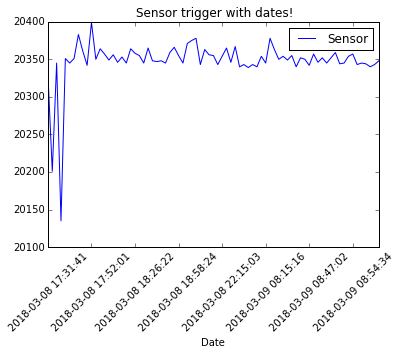

In [18]:
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Sensor','Date']
df = pd.read_csv('order9.csv', parse_dates= True, names=headers, infer_datetime_format=True, skiprows=1)

df.head()

df1 = df.ix[df.Sensor > 20000]

df1.plot(x='Date',y='Sensor', kind='line')

plt.title('Sensor trigger with dates!', color='black')
plt.tight_layout()
plt.xticks(rotation=45)
plt._show()




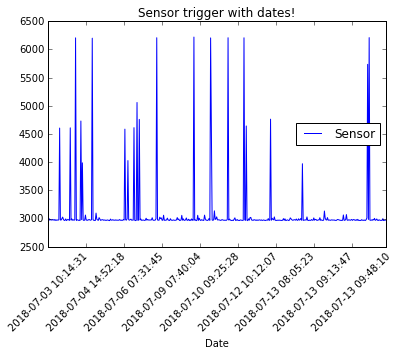

In [6]:
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Sensor','Date']
df = pd.read_csv('karl8.csv', parse_dates= True, names=headers, infer_datetime_format=True, skiprows=1)

df.head()
#df1 = df.ix[df.Sensor > 20000]

df.plot(x='Date',y='Sensor', kind='line')

plt.title('Sensor trigger with dates!', color='black')
plt.tight_layout()
plt.xticks(rotation=45)
plt._show()



In [13]:

headers = ['Sensor Value','date']
df = pd.read_csv('trigger1.csv', parse_dates= True, names=headers, infer_datetime_format=True)


#df.dropna()
#print(df)
#df.head()



#print(df)
df.plot(x='date',y='Sensor Value', kind='line')
plt.title('Motion sensor data visualization between 08.03.18 and 09.03.18', color='black')
plt.xlabel('Date')
plt.ylabel('States')
plt.tight_layout()
plt.xticks(rotation=25)

plt.grid(True)
plt._show()


In [51]:
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)

data = Data([trace0])

py.iplot(data, filename = 'basic-line')

In [2]:
import pandas as pd # conventional alias
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing


/home/seggs/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [4]:


dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
#df
dataset.keys()

#print ( dataset.feature_names)


df['PRICE' ]= dataset.target
df.head()
#df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2


In [38]:
# X is the dataset and y is prices which is to be predicted based on the coeffs(slope) and intercept for a linear model
X = df.drop( 'PRICE', axis = 1 )
y = df[ 'PRICE']
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# fit the model
lm.fit( X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print ( "Estimated intercept coeff: ", lm.intercept_ )
print ( "Number of coeffs: ", len( lm.coef_ ))
print ( "Coeffs = ", lm.coef_ )

('Estimated intercept coeff: ', 1.4921397450962104e-13)
('Number of coeffs: ', 14)
('Coeffs = ', array([  2.86724913e-16,  -4.16333634e-17,   6.93889390e-16,
        -3.55271368e-15,  -2.32591724e-14,  -1.84227633e-15,
        -2.22044605e-16,  -1.49880108e-15,  -6.10622664e-16,
        -8.32667268e-17,  -4.85722573e-17,  -2.01227923e-16,
        -5.55111512e-16,   1.00000000e+00]))


In [41]:
pd.DataFrame( zip(X.columns, lm.coef_),
columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,CRIM,2.867249e-16
1,ZN,-4.163336e-17
2,INDUS,6.938894e-16
3,CHAS,-3.552714e-15
4,NOX,-2.325917e-14
5,RM,-1.842276e-15
6,AGE,-2.220446e-16
7,DIS,-1.498801e-15
8,RAD,-6.106227e-16
9,TAX,-8.326673e-17


In [44]:
#Generate a plot of Price versus RM (Avg # of Rooms per dwelling)
plt.scatter( df.RM, df.PRICE, s=5 )
plt.xlabel( "Avg. # Rooms" )
plt.ylabel( "Housing Price (in $10,000)" )
plt.title( "Price vs. # Rooms")
plt.show()

In [58]:
#Predicting Prices
lm.predict( X)[0:15]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2])

In [45]:
plt.scatter( df.PRICE, lm.predict(X), s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")
plt.show()

In [48]:
#Let's compute the mean squared error:
mse = np.mean( (df.PRICE - lm.predict(X)) ** 2)
print ( "Mean squared error = ", mse )

('Mean squared error = ', 4.359329548988232e-28)


In [51]:
#Training and Validating
X_train, X_test, y_train, y_test = \
cross_validation.train_test_split( X,
df.PRICE,
test_size=0.33,
random_state=5 )
print ( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 14) (167, 14) (339,) (167,)


In [52]:
#Building a linear regression model using only the train data:
lm = LinearRegression()
lm.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
pred_train = lm.predict( X_train )
pred_test = lm.predict( X_test )
print ( "mse_train = ", np.mean( (y_train - lm.predict(X_train)) ** 2) )
print ( "mse_test = ", np.mean( (y_test - lm.predict(X_test)) ** 2) )

mse_train =  7.34431829784e-28
mse_test =  8.10977352875e-28


In [54]:
#Plotting the Residuals
plt.scatter( lm.predict(X_train), lm.predict(X_train) - y_train,
c ='b', s=30, alpha=0.4 )
plt.scatter( lm.predict(X_test), lm.predict(X_test) - y_test,
c ='g', s=30 )
plt.hlines( y=0, xmin= - 5, xmax=55)
plt.title( "Residuals" )
plt.ylabel( "Residuals" )
plt.show()

In [8]:
import csv
file = open("INPUT.txt", 'r')

# Read the file
new_text = file.readlines()

# Create a list to keep all the words in file
words = []
line_break = 0

# Add all the words in file to list
for x in range(0, len(new_text)):
    for word in new_text[x].split():
        if (line_break == 5):
            f.write('\n')
        words.append(word + ',')

# Write words into csv file
f = open('OUTPUT.csv','w')
for x in range(0, len(words)):
	if (line_break == 5):
		f.write('\n')
		f.write(words[x])
		line_break = 1
	else:
		f.write(words[x])
		line_break += 1
f.close()
data = pd.read_csv('OUTPUT1.csv',low_memory=False)

##data['PRICE' ]= data.target


#data['Target' ]= 'Normal'
data.head()

data['ADLs'].describe()

count               248
unique                9
top       Spare_Time/TV
freq                 77
Name: ADLs, dtype: object

In [42]:
# ONE CLASS SVM

data.loc[data['ADLs'] == "Slepping.", "attack"] = 1 
data.loc[data['ADLs'] != "Sleeping.", "attack"] = -1

target = data['attack']



In [113]:
data = pd.read_csv('order.csv',low_memory=False)
data['target'] = 'presence'
data['state_scale'] = data['state'].
data.head()

,state,timestamp,target,state_scale
0,2300,2018-03-02 16:04:24,presence,2300
1,3301,2018-03-02 16:04:25,presence,3301
2,4302,2018-03-02 16:04:26,presence,4302
3,5303,2018-03-02 16:04:27,presence,5303
4,6304,2018-03-02 16:04:28,presence,6304


In [13]:
outliers = target[target == 1]  

print("outliers.shape", outliers.shape)  

outliers.shape (0,)


In [101]:
#Svm
df= pd.read_csv('mydata.csv',low_memory=False)

# making it one class
df.loc[df['Class'] == "Normal", "Abnormal"] = 1  
df.loc[df['Class'] != "Normal", "Abnormal"] = -1

#Seperating attributes X from class y

target = df['Abnormal']
target
outliers = target[target == -1]  
print("outliers.shape", outliers.shape)  
#print("outlier fraction", outliers.shape[0]/target.shape[0])
#df.drop('Class', axis=1)
df.drop(["Class", "Abnormal"], axis=1, inplace=True)
df.shape

outliers.shape (2,)


(14, 3)

In [102]:
# Splitting test and train by 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2)

X_train


,StartDate,EndDate,Adl
9,2011-11-28 14:22:38,2011-11-28 14:27:07,2
3,2011-11-28 10:34:23,2011-11-28 10:43:00,4
2,2011-11-28 10:25:44,2011-11-28 10:33:00,3
11,2011-11-28 15:04:59,2011-11-28 15:06:29,5
7,2011-11-28 13:09:31,2011-11-28 13:29:09,7
12,2011-11-28 15:07:01,2011-11-28 20:20:00,9
5,2011-11-28 10:51:41,2011-11-28 13:05:07,6
8,2011-11-28 13:38:40,2011-11-28 14:21:40,6
1,2011-11-28 10:21:24,2011-11-28 10:23:36,2
4,2011-11-28 10:49:48,2011-11-28 10:51:13,5


In [104]:
from sklearn import svm

# set nu (which should be the proportion of outliers in our dataset)
#nu = outliers.shape[0] / target.shape[0]  
#print("nu", nu)

#model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005)  
#model.fit(X_train)



from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

ValueError: invalid literal for float(): 2011-11-28 13:06:31